In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
import random


In [2]:
logs=pd.read_csv('logs.csv')

C:\Users\bruno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
logs

,item_id,timestamp,contributor_username,contributor_id,contributor_ip,comment,logtype,action,title
0,1,2004-12-23T07:10:09Z,Sabbut,2075.0,NaN,el contenido era: 'Si aprendés Pensamiento Cie...,delete,delete,Verificacionismo
1,2,2004-12-23T07:14:09Z,Sabbut,2075.0,NaN,el contenido era: '{{destruir}}en algun lugar ...,delete,delete,Rapunzel
2,3,2004-12-23T07:26:10Z,Sabbut,2075.0,NaN,el contenido era: '#REDIRECT [[Flash]]',delete,delete,Macromedia Flash
3,4,2004-12-23T07:55:09Z,Sanbec,7856.0,NaN,Sin información de origen ni de licencia. Hay ...,delete,delete,Archivo:Gnu head.png
4,5,2004-12-23T08:02:22Z,Sanbec,7856.0,NaN,Sustituida por [[commons:Image:Heckert_GNU.png]],delete,delete,Archivo:Gnu-head-sm.jpg
...,...,...,...,...,...,...,...,...,...
12188941,15587395,2021-09-03T03:09:13Z,SeroBOT,4980693.0,NaN,Aviso de pruebas a usuario tras reversiones co...,create,create,Usuario discusión:El guachicol
12188942,15587396,2021-09-03T03:09:48Z,Leonpolanco,561850.0,NaN,Página creada con «{{subst:Aviso prueba2|Luis ...,create,create,Usuario discusión:2806:2F0:3140:BE0:C09B:D1C4:...
12188943,15587397,2021-09-03T03:09:49Z,Desiretjs,6335019.0,NaN,NaN,newusers,create,Usuario:Desiretjs
12188944,15587398,2021-09-03T03:10:33Z,Correogsk,443260.0,NaN,Página redirigida a [[Contenedor]],create,create,Contenedores


In [4]:
#29
matriz= logs.filter(["logtype", "action"]).value_counts().reset_index(name="coincidencias")
matriz = matriz.pivot_table(values='coincidencias', index='action', columns='logtype', aggfunc='mean', fill_value = 0)

In [5]:
matriz

logtype,block,campus,contentmodel,course,create,delete,eparticle,gblblock,gblrights,growthexperiments,...,online,patrol,protect,renameuser,rights,student,tag,thanks,upload,usermerge
action,,,,,,,,,,,,,,,,,,,,,
add,0,17,0,188,0,0,1303,0,0,0,...,15,0,0,0,0,519,0,0,0,0
addlink,0,0,0,0,0,0,0,0,0,141,...,0,0,0,0,0,0,0,0,0,0
autocreate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
block,342302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
byemail,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change,0,0,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
create,0,0,0,0,1322454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
create2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
delete,0,0,0,0,0,2396391,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
contenido = pd.read_csv('contents.csv')

In [7]:
contenido

,title,id,namespace,revision_id,parent_revision,revision_timestamp,revisor_username,revisor_id,revisor_ip,revisor_comment
0,Wikipedia:Artículos solicitados,5,4,132533307,132516631.0,2021-01-19T18:40:34Z,Metrónomo,1708233.0,NaN,Así esta mejor
1,Andorra,7,0,138035057,138027475.0,2021-08-31T18:27:01Z,NaN,NaN,2800:CD0:FC1B:A900:C5A4:9E81:7175:2ED2,Añadir contenido
2,Argentina,10,0,137966826,137825165.0,2021-08-28T17:17:54Z,Traitrich,4642283.0,NaN,Reemplazos con [[Usuario:Benjavalero/Replacer|...
3,Geografía de Andorra,15,0,137986788,133666383.0,2021-08-29T17:16:00Z,Lojwe,5338508.0,NaN,Reemplazos con [[Usuario:Benjavalero/Replacer|...
4,Demografía de Andorra,17,0,130869554,129413188.0,2020-11-12T19:56:15Z,Jialxv,3615366.0,NaN,Correcciones ortográficas con [[Usuario:Benjav...
...,...,...,...,...,...,...,...,...,...,...
4132159,Cruz nestoriana,10010593,0,138052016,138051910.0,2021-09-01T12:06:00Z,Copydays,474907.0,NaN,termino traducción y quito plantilla en desarr...
4132160,Manifestación del orgullo gay de 1977 en Barce...,10010595,0,138051859,NaN,2021-09-01T11:52:28Z,Crls9011,4032712.0,NaN,Crls9011 trasladó la página [[Manifestación de...
4132161,Rocasaurus,10010596,0,138051902,NaN,2021-09-01T11:57:06Z,Gabriel Solo,158577.0,NaN,Gabriel Solo trasladó la página [[Rocasaurus]]...
4132162,Medalla Conmemorativa del 50.º Aniversario de ...,10010598,0,138051961,NaN,2021-09-01T12:01:38Z,Términus,5429951.0,NaN,Términus trasladó la página [[Medalla Conmemor...


In [8]:
#11
comentarios = contenido.value_counts("revisor_comment").reset_index(name="apariciones")

In [9]:
comentarios = comentarios[comentarios["apariciones"] >= 20 ]
comentarios_con_aparicion_M_20 = comentarios["revisor_comment"].to_list()

In [10]:
contenido["revisor_username"]=contenido["revisor_username"].fillna(contenido["revisor_ip"])

In [11]:
comentarios_y_usuarios = contenido[contenido['revisor_comment'].isin(comentarios_con_aparicion_M_20)].value_counts(["revisor_username", "revisor_comment"]).reset_index(name="apariciones")

In [12]:
comentarios_y_usuarios_tabla = comentarios_y_usuarios.pivot_table(values='apariciones', index= "revisor_username", columns='revisor_comment', aggfunc='count', fill_value = 0).astype(bool)

In [13]:
comentarios_y_usuarios_tabla

revisor_comment,"#QuédateEnTuCasaYEditaWikipedia. Nuevo, localidad",#REDIRECCIÓN,#REDIRECT,#REDIRECT [[Anexo:Glosario de términos de sumo]],#REDIRECT [[Echinopsis]],#REDIRECT [[Wikipedia:Consultas de borrado/Lista de universidades por país]],#REDIRECT [[]],#WPWP,#WPWP #WPWPARK,#WPWP #WPWPSR,...,Última versión,—,− 2 categorías; + 2 categorías mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Distrito de Botoșani]]; ±[[Categoría:Localidades de Rumania]]→[[Categoría:Localidades del distrito de Botoșani]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Edificios y estructuras de Manhattan]]; ±[[Categoría:Casas de Nueva York]]→[[Categoría:Casas de Manhattan]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Pasión de Jesús en el arte]]; +[[Categoría:Pasión de Jesús en la pintura]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Provincia de Nordland]]; ±[[Categoría:Localidades de Noruega]]→[[Categoría:Localidades portuarias del condado de Nordland]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Provincia de Nordland]]; ±[[Categoría:Municipios de Noruega]]→[[Categoría:Municipios de Nordland]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Provincia de Trøndelag]]; ±[[Categoría:Localidades de Noruega]]→[[Categoría:Localidades de Trøndelag]] mediante [[Wikipedia:HotCat|HotCat]],−[[Categoría:Santos católicos]]; −[[Categoría:Santos de la Iglesia ortodoxa]]; +[[Categoría:Santo católico y ortodoxo]] mediante [[Wikipedia:HotCat|HotCat]]
revisor_username,,,,,,,,,,,,,,,,,,,,,
"""BF CLUB""",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"""CLUB BF""",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
&beer&love,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(:Julien:),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(KGC2) KosmoGelo II,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
熊,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
猫に小判,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
諾恩,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#12
comentarios_con_mejor=contenido.filter(["revisor_comment"])

In [15]:
comentarios_con_mejor["revisor_comment"]=comentarios_con_mejor["revisor_comment"].fillna("-")

In [16]:
comentarios_con_mejor["revisor_comment"] = comentarios_con_mejor["revisor_comment"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [17]:
comentarios_con_mejor=comentarios_con_mejor[(comentarios_con_mejor["revisor_comment"].str.lower().str.endswith("mejor")) | (comentarios_con_mejor["revisor_comment"].str.lower().str.contains("mejor "))== True]

In [18]:
comentarios_con_mejor.count()

revisor_comment    5210
dtype: int64

In [19]:
#28
usuarios_creados = logs[logs["action"].str.contains("create")  == True]

In [20]:
usuarios_creados = usuarios_creados[usuarios_creados["logtype"].str.contains("newusers")  == True]

In [21]:
usuarios_creados=usuarios_creados.filter(["contributor_username", "timestamp"])

In [22]:
usuarios_creados=usuarios_creados.set_index("contributor_username").filter(["contributor_username", "timestamp"])

In [23]:
ultima_actividad = logs.sort_values("timestamp", ascending=False)

In [24]:
ultima_actividad=ultima_actividad.drop_duplicates("contributor_username").filter(["contributor_username", "timestamp"])

In [25]:
ultima_actividad = ultima_actividad.set_index("contributor_username").rename(columns={"timestamp": "timestamp_actividad"})

In [26]:
conjunto=ultima_actividad.filter(usuarios_creados.index, axis=0).join(usuarios_creados).dropna("index")

In [27]:
conjunto["timestamp"] = pd.to_datetime(conjunto["timestamp"])
conjunto["timestamp"] = conjunto["timestamp"].astype(np.int64) 
conjunto["timestamp_actividad"] = pd.to_datetime(conjunto["timestamp_actividad"])
conjunto["timestamp_actividad"] = conjunto["timestamp_actividad"].astype(np.int64) 

In [28]:
conjunto["promedio"] = (conjunto["timestamp_actividad"] + conjunto["timestamp"]) / 2

In [29]:
conjunto["timestamp"] = pd.to_datetime(conjunto["timestamp"])
conjunto["timestamp_actividad"] = pd.to_datetime(conjunto["timestamp_actividad"])
conjunto["promedio"] = pd.to_datetime(conjunto["promedio"])

In [30]:
promedio=conjunto[conjunto.index.notnull()]

In [31]:
promedio

,timestamp_actividad,timestamp,promedio
contributor_username,,,
! ! ! ! ! ! ! ! ! ! ! ! ! ! HAGGEⓇ? 123,2013-03-24 07:08:16,2013-03-24 07:08:16,2013-03-24 07:08:16.000
! ! ! Histoire hebdomadaire de la patrie ! ! !,2019-01-07 13:00:46,2019-01-07 13:00:46,2019-01-07 13:00:46.000
! Bikkit !,2015-10-20 14:36:46,2015-10-20 14:36:46,2015-10-20 14:36:46.000
! DanSkammelsrod !,2006-12-28 17:07:56,2006-12-28 17:07:56,2006-12-28 17:07:56.000
! Mostaza 79,2021-05-05 22:12:58,2021-05-05 21:53:19,2021-05-05 22:03:08.500
...,...,...,...
𝚕𝚒𝚝𝚢 𝚌𝚟18,2021-01-17 18:11:26,2021-01-17 18:11:26,2021-01-17 18:11:26.000
😂,2008-07-01 12:27:03,2008-07-01 12:27:03,2008-07-01 12:27:03.000
🤖,2016-11-23 17:18:22,2016-11-23 17:18:22,2016-11-23 17:18:22.000


In [32]:
#43
comentario_sobre_bloqueos = logs["action"].str.contains("block", na=0).reset_index(name="bool")
comentario_sobre_bloqueos = comentario_sobre_bloqueos[comentario_sobre_bloqueos["bool"] == True]
index = comentario_sobre_bloqueos["index"].to_list()

In [33]:
bloqueados=logs.filter(items=index, axis=0)

In [34]:
nombres_o_ips_de_usuarios_bloqueados = bloqueados["title"].apply(lambda x: str(x).replace("Usuario:", "")).value_counts().index.to_list()

In [35]:
revisores_bloqueados_y_fechas = contenido[contenido["revisor_username"].isin(nombres_o_ips_de_usuarios_bloqueados)]

In [36]:
bloqueados = bloqueados.filter(items=["timestamp", "title"])
bloqueados["title"] = bloqueados["title"].apply(lambda x: str(x).replace("Usuario:", ""))

In [37]:
revisores_bloqueados_y_fechas =revisores_bloqueados_y_fechas.sort_values(by="revision_timestamp", ascending=False).drop_duplicates("title").filter(items=["revision_timestamp", "revisor_username"])

In [38]:
primer_fecha_de_bloqueo=bloqueados.drop_duplicates("title")

In [39]:
cantidad_de_revisores_bloqueados=revisores_bloqueados_y_fechas["revisor_username"].drop_duplicates().count()

In [40]:
cantidad_de_revisores_bloqueados

5864

In [41]:
revisores_bloqueados_y_fechas_promedio_fechas = revisores_bloqueados_y_fechas
revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"] = pd.to_datetime(revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"])
revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"] = revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"].astype(np.int64) 
revisores_bloqueados_y_fechas_promedio_fechas=revisores_bloqueados_y_fechas_promedio_fechas.groupby("revisor_username").mean()
revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"] = pd.to_datetime(revisores_bloqueados_y_fechas_promedio_fechas["revision_timestamp"])

In [42]:
revisores_bloqueados_y_fechas_promedio_fechas=revisores_bloqueados_y_fechas_promedio_fechas.sort_index()

In [43]:
fechas_de_bloque_y_promedio_de_actividad=primer_fecha_de_bloqueo[primer_fecha_de_bloqueo["title"].isin(revisores_bloqueados_y_fechas_promedio_fechas.index)].sort_values("title")

In [44]:
fechas_de_bloque_y_promedio_de_actividad["timestamp"] = pd.to_datetime(fechas_de_bloque_y_promedio_de_actividad["timestamp"])
fechas_de_bloque_y_promedio_de_actividad["timestamp"] = fechas_de_bloque_y_promedio_de_actividad["timestamp"].astype(np.int64) 
fechas_de_bloque_y_promedio_de_actividad = fechas_de_bloque_y_promedio_de_actividad.groupby("title").mean()
fechas_de_bloque_y_promedio_de_actividad["timestamp"]=pd.to_datetime(fechas_de_bloque_y_promedio_de_actividad["timestamp"])

In [45]:
fechas_de_bloque_y_promedio_de_actividad=fechas_de_bloque_y_promedio_de_actividad.join(revisores_bloqueados_y_fechas_promedio_fechas)

In [46]:
fechas_de_bloque_y_promedio_de_actividad["defierencia_entre_fechas"] = fechas_de_bloque_y_promedio_de_actividad["timestamp"] - fechas_de_bloque_y_promedio_de_actividad["revision_timestamp"]

In [47]:
fechas_de_bloque_y_promedio_de_actividad

,timestamp,revision_timestamp,defierencia_entre_fechas
title,,,
"""BF CLUB""",2019-09-22 21:16:39,2019-09-30 08:39:28.714285568,-8 days +12:37:10.285714432
$leazytor,2012-11-30 19:33:11,2012-11-26 03:44:36.000000000,4 days 15:48:35
&beer&love,2019-08-30 15:41:10,2018-09-23 16:08:15.466695424,340 days 23:32:54.533304576
-dam-,2014-04-06 15:07:31,2013-02-06 16:01:48.749999872,423 days 23:05:42.250000128
-seb-,2012-02-18 05:22:29,2011-12-18 14:26:40.545454592,61 days 14:55:48.454545408
...,...,...,...
日本語,2009-12-16 17:14:35,2009-10-22 03:19:22.500000000,55 days 13:55:12.500000
東急電鉄,2010-10-16 07:34:20,2010-09-10 18:20:35.000000000,35 days 13:13:45
爆笑連合,2010-08-08 20:16:15,2010-07-23 00:39:47.000000000,16 days 19:36:28


In [48]:
##49
lenguajes=pd.read_csv('languages.csv')

In [49]:
comentarios_y_id_del_user = contenido.filter(items=["revisor_id", "revisor_comment"])
revisores_sin_comentarios = comentarios_y_id_del_user[comentarios_y_id_del_user["revisor_comment"]== "-"]["revisor_id"]
revisores_sin_comentarios_lista =  revisores_sin_comentarios.to_list()
babel_users_sin_comentarios=lenguajes[lenguajes["babel_user"].isin(revisores_sin_comentarios)]
babel_users_sin_comentarios_que_saben_1_o_mas_idiomas = babel_users_sin_comentarios[babel_users_sin_comentarios["babel_level"]!="N"]
babel_users_sin_comentarios_que_saben_1_o_mas_idiomas = babel_users_sin_comentarios_que_saben_1_o_mas_idiomas[babel_users_sin_comentarios_que_saben_1_o_mas_idiomas["babel_level"]>="1"]
cantidad_comentarios_y_id_del_user = comentarios_y_id_del_user[comentarios_y_id_del_user["revisor_id"].isin(revisores_sin_comentarios_lista)]["revisor_id"].value_counts()

In [50]:
cantidad_sin_comentarios=revisores_sin_comentarios.value_counts().sort_index().to_list()
cantidad_comentarios_y_id_del_user_frame=cantidad_comentarios_y_id_del_user.sort_index().to_frame()

In [51]:
cantidad_comentarios_y_id_del_user_frame=cantidad_comentarios_y_id_del_user_frame.assign(sin_comentarios = cantidad_sin_comentarios)
cantidad_comentarios_y_id_del_user_frame["tasa"]=cantidad_comentarios_y_id_del_user_frame["sin_comentarios"]/cantidad_comentarios_y_id_del_user_frame["revisor_id"]
cantidad_comentarios_y_id_del_user_frame["ids"] = cantidad_comentarios_y_id_del_user_frame.index

In [52]:
cantidad_de_idiomas_conocidos=babel_users_sin_comentarios_que_saben_1_o_mas_idiomas.sort_values("babel_user")["babel_user"].value_counts()

In [53]:
cantidad_comentarios_y_id_del_user_frame_red=cantidad_comentarios_y_id_del_user_frame.copy()[cantidad_comentarios_y_id_del_user_frame["ids"].isin(cantidad_de_idiomas_conocidos.index) == True]

In [54]:
cantidad_comentarios_y_id_del_user_frame_red["idiomas_conocidos"] = cantidad_de_idiomas_conocidos.sort_index().to_list()

In [55]:
cantidad_comentarios_y_id_del_user_frame_red=cantidad_comentarios_y_id_del_user_frame_red.filter(items=["idiomas_conocidos",  "tasa"])

<AxesSubplot:xlabel='idiomas_conocidos'>

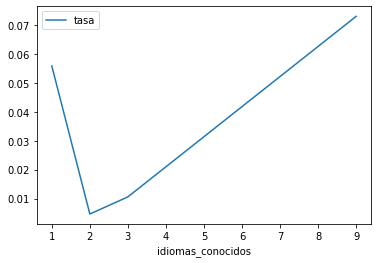

In [56]:
cantidad_comentarios_y_id_del_user_frame_red.filter(items=["idiomas_conocidos","tasa" ]).groupby("idiomas_conocidos").mean().plot.line()

In [57]:
#17
contenido_de_texto=pd.read_csv('contents_text_sample.csv')

In [58]:
contenido_de_texto["text"]=contenido_de_texto["text"].fillna("-")

In [59]:
vectorizador = CountVectorizer(lowercase=True, stop_words = nltk.corpus.stopwords.words("spanish"), ngram_range = (2,2))

In [60]:
query = "retablo iglesia"

In [61]:
palabra_a_buscar = vectorizador.fit_transform([query])

In [62]:
matriz_query = vectorizador.transform(contenido_de_texto["text"])

In [63]:
contador = 0
lista = []
for x in matriz_query:
    if x.sum() >= 1:
        lista.append(contador)
    contador +=1
        

In [64]:
contenido_de_texto.loc[random.choice(lista)]

id                                                  162187
title                                Villasabariego (León)
text     {{Ficha de localidad de España\n| nombre      ...
Name: 3675, dtype: object

In [65]:
#2a

In [66]:
#Visualizacion 1 Distrbucion del precio de cierre segun el dia de la semana
datos_soja_visu1 = pd.read_csv("datasetRofex4 - datasetRofex2.csv")


In [67]:
datos_soja_visu1["Fecha"] = pd.to_datetime(datos_soja_visu1["Fecha"])

In [68]:
datos_soja_visu1["Fecha"]=datos_soja_visu1["Fecha"].dt.day_name("spanish")

In [69]:
Densidad_de_cierre_segun_el_dia_de_la_semana=datos_soja_visu1.sort_values("Fecha").filter(["Cierre", "Fecha"])

In [70]:
sorter = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
sorterIndex = dict(zip(sorter,range(len(sorter))))

In [71]:
Densidad_de_cierre_segun_el_dia_de_la_semana['Day_id'] = Densidad_de_cierre_segun_el_dia_de_la_semana["Fecha"]

In [72]:
Densidad_de_cierre_segun_el_dia_de_la_semana['Day_id'] = Densidad_de_cierre_segun_el_dia_de_la_semana['Day_id'].apply(lambda x: sorterIndex[x])

In [73]:
Densidad_de_cierre_segun_el_dia_de_la_semana.sort_values('Day_id', inplace=True)

Text(0.5, 1.0, ' Distrbucion del precio de cierre segun el dia de la semana')

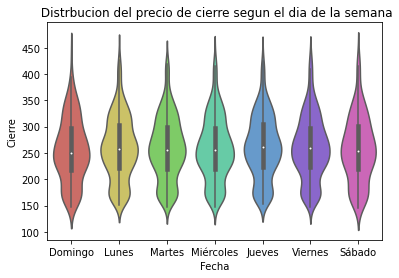

In [74]:
sns.violinplot(x="Fecha", y="Cierre", data=Densidad_de_cierre_segun_el_dia_de_la_semana, palette="hls").set_title(" Distrbucion del precio de cierre segun el dia de la semana")

In [75]:
#Visualizacion 2 distribucion del precio de Cierre segun el mes y el año

In [76]:
datos_soja_visu2 = pd.read_csv("datasetRofex4 - datasetRofex2.csv")

In [77]:
datos_soja_visu2["DolarB.N."]=datos_soja_visu2["DolarB.N."].apply(lambda x: x.replace(',', '.'))
datos_soja_visu2["DolarB.N."]=datos_soja_visu2["DolarB.N."].apply(lambda x: round(float(x), 2))

In [78]:
datos_soja_visu2["Fecha"] = pd.to_datetime(datos_soja_visu2["Fecha"])
datos_soja_visu2["Mes"] = datos_soja_visu2["Fecha"].dt.month
datos_soja_visu2["Fecha"]=datos_soja_visu2["Fecha"].dt.year

Text(0.5, 1.0, 'distribucion del precio de Cierre segun el mes y el año')

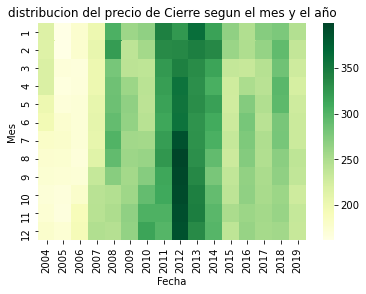

In [79]:
dolares=datos_soja_visu2.filter(items=["Cierre", "Mes", "Fecha"])
sns.heatmap(dolares.pivot_table(values='Cierre', index= "Mes", columns='Fecha', aggfunc='mean', fill_value = 0), cmap="YlGn").set_title("distribucion del precio de Cierre segun el mes y el año")

In [80]:
#Visualizacion 3 acumulacion de casos segun la region
entrenamiento =  pd.read_csv("Entrenamieto_ECI_2020.csv")

In [81]:
region_y_stage_de_oportunidad = entrenamiento.filter(items=["Stage", "Region"])

<AxesSubplot:title={'center':'acumulacion de casos segun la region'}, xlabel='Region', ylabel='porcentaje de coincidencias'>

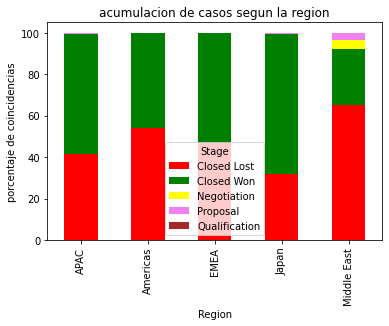

In [82]:
region_y_stage_de_oportunidad_table=region_y_stage_de_oportunidad.value_counts().reset_index(name="coincidencias")
region_y_stage_de_oportunidad_table_graficar = region_y_stage_de_oportunidad_table.pivot_table(index="Stage", columns="Region", values="coincidencias") 
region_y_stage_de_oportunidad_table_graficar[["APAC","Americas", "EMEA", "Japan", "Middle East"]] = region_y_stage_de_oportunidad_table_graficar[["APAC","Americas", "EMEA", "Japan", "Middle East"]].div(region_y_stage_de_oportunidad_table_graficar[["APAC","Americas", "EMEA", "Japan", "Middle East"]].sum(axis=0), axis=1).multiply(100)
region_y_stage_de_oportunidad_table_graficar.T.plot(kind='bar', stacked=True, ylabel= "porcentaje de coincidencias", color=['red', 'g', 'yellow', 'violet', 'brown'], title="acumulacion de casos segun la region")

In [83]:
#Visualizacion 4 distribucion de casos segun el cuatrimestre
densidad_del_stage_segun_el_monto = entrenamiento.filter(items=["Stage", "Delivery_Quarter"])

In [84]:
casos_perdidos_y_ganados_por_cuatrimestre=densidad_del_stage_segun_el_monto.value_counts().reset_index(name="coincidencias").pivot_table(values='coincidencias', index= "Stage", columns='Delivery_Quarter', aggfunc='mean', fill_value = 0).filter(["Closed Lost", "Closed Won"], axis=0)

Text(0.5, 1.0, ' distribucion de casos segun el cuatrimestre')

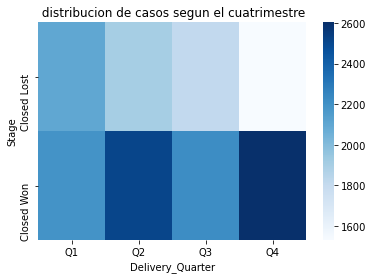

In [85]:
sns.heatmap(casos_perdidos_y_ganados_por_cuatrimestre, cmap="Blues").set_title(" distribucion de casos segun el cuatrimestre")
#se ultilizaron solo estos dos casos ya que los otros 2 tienen una cantidad de casos muy menor 

In [86]:
#Visualizacion 5 Cantidad de ventas segun el dia de un sku en especifico

In [87]:
data2=pd.read_parquet("MeliDataParquet.parquet")

In [88]:
sku_y_cantidad_vendida = data2.filter(["sku", "sold_quantity", "date"])

In [89]:
sku_y_cantidad_vendida =sku_y_cantidad_vendida[sku_y_cantidad_vendida["sku"] == 526920]

In [90]:
sku_y_cantidad_vendida["date"] = pd.to_datetime(sku_y_cantidad_vendida["date"])

In [91]:
sku_y_cantidad_vendida["date"]=sku_y_cantidad_vendida["date"].dt.day_name("spanish")

Text(0.5, 1.0, 'Cantidad de ventas segun el dia del sku:526920 ')

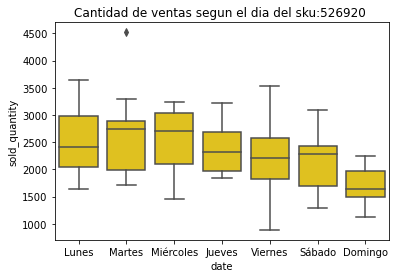

In [92]:
sns.boxplot(x="date", y="sold_quantity", data=sku_y_cantidad_vendida, color="gold").set_title("Cantidad de ventas segun el dia del sku:526920 ")

In [93]:
#Visualizacion 6 Frecuencia de cantidad de de prducto vendido de un sku especifico
sku_y_cantidad_vendida2 = data2.filter(["sku", "sold_quantity"])
sku_y_cantidad_vendida2 =sku_y_cantidad_vendida2[sku_y_cantidad_vendida2["sku"] == 526920]

Text(0.5, 1.0, 'Frecuencia de cantidad de prducto vendido del sku:526920')

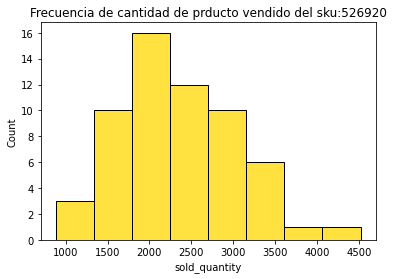

In [94]:
sns.histplot(data=sku_y_cantidad_vendida2["sold_quantity"], color="gold").set_title("Frecuencia de cantidad de prducto vendido del sku:526920" )

In [95]:
#Visualizacion 7

<img src="Pokemons distribuido por sus stats.png">